In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/amir.csv')
data.head()

,Transaction Hash,Block Number,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Product Name,Product ID,Product Description,Quantity,Price,Fraudulent
0,0xa123456789,1234567,0x111111111,0x222222222,0.01 ETH,21000,Product A,P0001,Description A,5,10 ETH,0
1,0xb123456789,1234568,0x111111111,0x333333333,0.02 ETH,22000,Product B,P0002,Description B,10,20 ETH,0
2,0xc123456789,1234569,0x222222222,0x111111111,0.03 ETH,23000,Product C,P0003,Description C,15,30 ETH,1
3,0xd123456789,1234570,0x333333333,0x111111111,0.04 ETH,24000,Product D,P0004,Description D,20,40 ETH,0
4,0xe123456789,1234571,0x444444444,0x111111111,0.05 ETH,25000,Product E,P0005,Description E,25,50 ETH,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the original dataset
data = pd.read_csv('/content/drive/MyDrive/customer/amir.csv')

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to 'Fruit Code' and 'Browning Symptoms'
data['Transaction Hash'] = le.fit_transform(data['Transaction Hash'])
data['Sender Address'] = le.fit_transform(data['Sender Address'])
data['Receiver Address'] = le.fit_transform(data['Receiver Address'])
data['Product Name'] = le.fit_transform(data['Product Name'])
data['Product ID'] = le.fit_transform(data['Product ID'])
data['Product Description'] = le.fit_transform(data['Product Description'])

# Save the modified DataFrame to a new Excel file
data.to_csv('/content/drive/MyDrive/customer/amir1.csv', index=False)

# Verify changes by viewing the first few rows
data.head()


,Transaction Hash,Block Number,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Product Name,Product ID,Product Description,Quantity,Price,Fraudulent
0,0,1234567,0,1,0.01 ETH,21000,0,0,0,5,10 ETH,0
1,1,1234568,0,2,0.02 ETH,22000,1,1,1,10,20 ETH,0
2,2,1234569,1,0,0.03 ETH,23000,2,2,2,15,30 ETH,1
3,3,1234570,2,0,0.04 ETH,24000,3,3,3,20,40 ETH,0
4,4,1234571,3,0,0.05 ETH,25000,4,4,4,25,50 ETH,1


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/customer/amir1.csv')

# Replace 'ETH' in all columns (assuming the columns have values like '0.01 ETH')
# Apply this operation to the specific columns where this pattern exists
# Replace 'ETH' and any leading/trailing whitespace with an empty string
data = data.replace({'ETH': ''}, regex=True)

# Convert the modified values to numeric type (if necessary)
data = data.apply(pd.to_numeric, errors='ignore')

# Save the modified DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/customer/amir2.csv', index=False)

# Verify changes by viewing the first few rows
data.head()


,Transaction Hash,Block Number,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Product Name,Product ID,Product Description,Quantity,Price,Fraudulent
0,0,1234567,0,1,0.01,21000,0,0,0,5,10,0
1,1,1234568,0,2,0.02,22000,1,1,1,10,20,0
2,2,1234569,1,0,0.03,23000,2,2,2,15,30,1
3,3,1234570,2,0,0.04,24000,3,3,3,20,40,0
4,4,1234571,3,0,0.05,25000,4,4,4,25,50,1


In [54]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/amir2.csv')
data.head()

,Transaction Hash,Block Number,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Product Name,Product ID,Product Description,Quantity,Price,Fraudulent
0,0,1234567,0,1,0.01,21000,0,0,0,5,10,0
1,1,1234568,0,2,0.02,22000,1,1,1,10,20,0
2,2,1234569,1,0,0.03,23000,2,2,2,15,30,1
3,3,1234570,2,0,0.04,24000,3,3,3,20,40,0
4,4,1234571,3,0,0.05,25000,4,4,4,25,50,1


In [55]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv('/content/drive/MyDrive/customer/amir2.csv')

# Drop the 'Product ID' column
data = data.drop(columns=['Product ID', 'Transaction Hash', 'Block Number', 'Product Name', 'Product Description' ])

# Save the updated DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/customer/amir3.csv', index=False)

# Verify changes by viewing the first few rows
data.head()


,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Quantity,Price,Fraudulent
0,0,1,0.01,21000,5,10,0
1,0,2,0.02,22000,10,20,0
2,1,0,0.03,23000,15,30,1
3,2,0,0.04,24000,20,40,0
4,3,0,0.05,25000,25,50,1


In [69]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/amir3.csv')
data.head()

,Sender Address,Receiver Address,Transaction Fee,Gas Limit,Quantity,Price,Fraudulent
0,0,1,0.01,21000,5,10,0
1,0,2,0.02,22000,10,20,0
2,1,0,0.03,23000,15,30,1
3,2,0,0.04,24000,20,40,0
4,3,0,0.05,25000,25,50,1


In [70]:
X = data.drop(['Price'], axis=1)
y = data['Price']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


     Sender Address  Receiver Address  Transaction Fee  Gas Limit  Quantity  \
0                 0                 1             0.01      21000         5   
1                 0                 2             0.02      22000        10   
2                 1                 0             0.03      23000        15   
3                 2                 0             0.04      24000        20   
4                 3                 0             0.05      25000        25   
..              ...               ...              ...        ...       ...   
364               0                 1             0.01      21000         5   
365               2                 2             0.02      22000        10   
366               1                 0             0.03      23000        15   
367               2                 0             0.04      24000        20   
368               3                 0             0.05      25000        25   

     Fraudulent  
0             0  
1             0

In [71]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Selected Features: Index(['Receiver Address', 'Transaction Fee', 'Gas Limit', 'Product Name',
       'Product Description', 'Quantity', 'Fraudulent'],
      dtype='object')
Mean Squared Error with Selected Features: 0.0


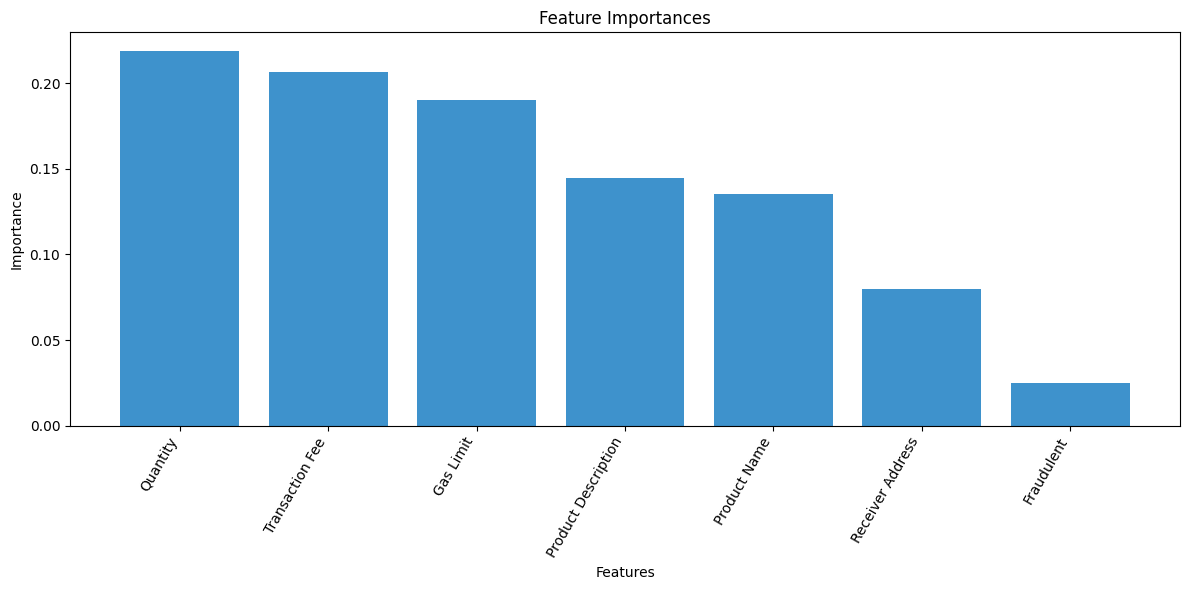

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

# A simple Ant Colony Optimization implementation for feature selection

# Define the parameters for ACO
num_ants = 1
num_features = X_train.shape[1]
num_iterations = 5
evaporation_rate = 0.5
alpha = 1
beta = 2

# Initialize pheromone levels
pheromones = np.ones(num_features)

# Define the heuristic information (can be uniform)
heuristic = np.ones(num_features)

# Define the probability of selecting each feature
def calculate_probabilities(pheromones, heuristic, alpha, beta):
    return (pheromones ** alpha) * (heuristic ** beta)

# Define the fitness function to evaluate a subset of features
def evaluate_feature_subset(features, X_train, y_train, X_val, y_val):
    X_train_subset = X_train[:, features]
    X_val_subset = X_val[:, features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_subset, y_train)

    y_pred = model.predict(X_val_subset)
    mse = mean_squared_error(y_val, y_pred)

    return -mse

# Main ACO loop
best_solution = None
best_score = float('-inf')

for iteration in range(num_iterations):
    all_solutions = []
    all_scores = []

    for ant in range(num_ants):
        solution = []

        for feature in range(num_features):
            if random.random() < calculate_probabilities(pheromones[feature], heuristic[feature], alpha, beta):
                solution.append(feature)

        if len(solution) == 0:
            solution = random.sample(range(num_features), k=random.randint(1, num_features))

        all_solutions.append(solution)
        score = evaluate_feature_subset(solution, X_train.values, y_train.values, X_val.values, y_val.values)
        all_scores.append(score)

        if score > best_score:
            best_score = score
            best_solution = solution

    # Update pheromones
    for feature in range(num_features):
        pheromones[feature] *= (1 - evaporation_rate)

        for solution, score in zip(all_solutions, all_scores):
            if feature in solution:
                pheromones[feature] += score

# Display the selected features and their importance
selected_features = X_train.columns[best_solution]
print(f'Selected Features: {selected_features}')

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Selected Features: {mse}')

# Assuming the model has already been trained and `importances` is available
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='#3e92cc', align='center')
plt.xticks(range(len(indices)), [selected_features[i] for i in indices], rotation=60, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

#print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 4.61
Root Mean Squared Error (RMSE): 2.15
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 1.17%


In [73]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 3.90
Root Mean Squared Error (RMSE): 1.98
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 2.59%


In [61]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)
        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=5).mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params


# Example train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200, 250],  # n_estimators
    [10, 20, 30, 40, None],    # max_depth
    [2, 5, 10, 15]             # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=10, n_best=5, n_iterations=20, decay=0.9)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
forest_model = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with Optimized Estimators:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with Optimized Estimators:
Best Hyperparameters: [250, None, 15]
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 3.59
Root Mean Squared Error (RMSE): 1.89
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 1.24%


In [74]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 30  # You can change this to your desired number

# Create and evaluate XGBRegressor with additional hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=num_estimators,
    learning_rate=0.05,  # Controls the step size for each boosting step
    max_depth=6,  # Maximum depth of a tree, increasing this can lead to overfitting
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators and Tuned Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 30 Estimators and Tuned Hyperparameters:
Mean Absolute Error (MAE): 2.94
Mean Squared Error (MSE): 12.95
Root Mean Squared Error (RMSE): 3.60
R-squared (R2): 0.93
Root Mean Squared Logarithmic Error (RMSLE): 0.07
Mean Absolute Percentage Error (MAPE): 16.02%
